<a href="https://colab.research.google.com/github/retineuraliartificiali/keras_tutorial/blob/master/tutorial_keras_cnn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist

#scarica i dati e crea il dataset di train e di test
print("Download in corso...")
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()
print("Fatto!")

print(Xtrain[0].flatten())

Using TensorFlow backend.


Download in corso...
Fatto!
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 18

Visualizziamo alcuni esempi all'interno del dataset di training per capire come sono fatte queste immagini

ORIGINAL SHAPE (28, 28)


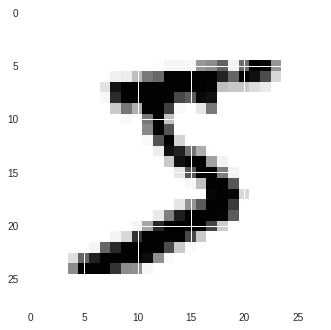

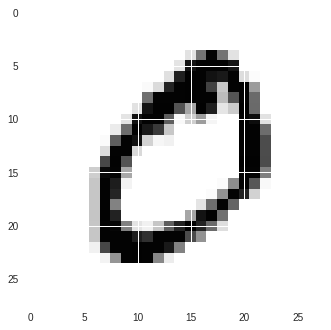

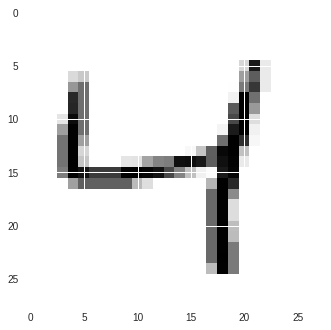

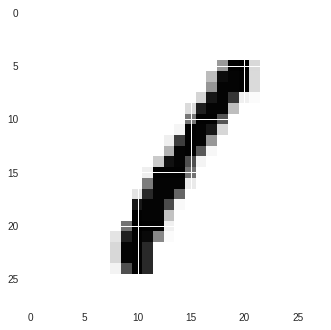

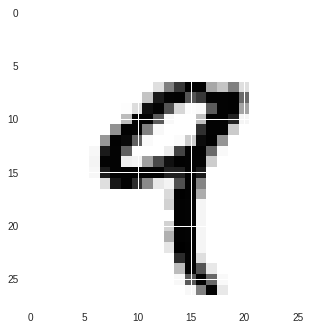

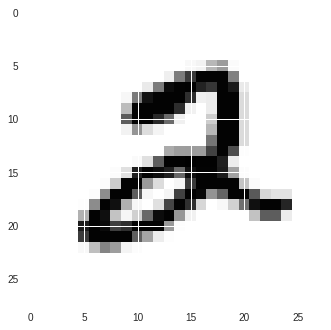

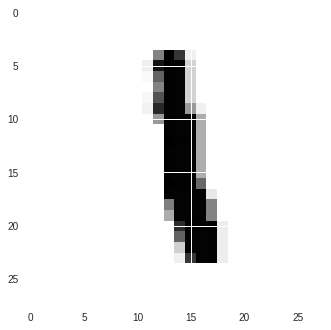

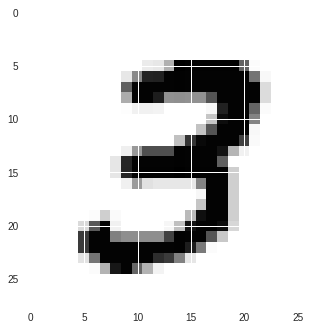

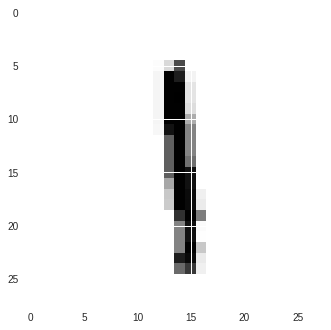

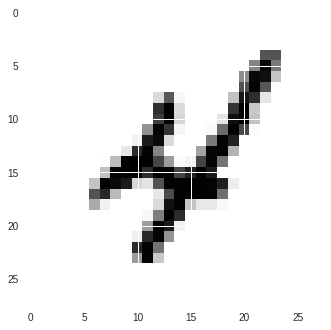

<Figure size 576x396 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt


print("ORIGINAL SHAPE",Xtrain[0].shape)

for k in range(0,10):
  plt.imshow(Xtrain[k])
  plt.figure()


In [0]:
tot_train_examples = 60000
tot_test_examples = 10000
width=28
height=28
channels = 1
f_size1 = 32
f_size2= 16

In [0]:
Xtrain_reshaped = Xtrain.reshape(tot_train_examples,width,height,channels)
Xtest_reshaped = Xtest.reshape(tot_test_examples,width,height,channels)

print("Nuova shape ",Xtrain_reshaped[0].shape)

Nuova shape  (28, 28, 1)


In [0]:
from keras.utils import to_categorical

y_train_cat = to_categorical(ytrain)
y_test_cat = to_categorical(ytest)
print(y_train_cat[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 79us/step - loss: 3.8395 - acc: 0.7204 - val_loss: 0.5004 - val_acc: 0.8998
Epoch 2/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.4011 - acc: 0.9109 - val_loss: 0.1290 - val_acc: 0.9626
Epoch 3/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.1806 - acc: 0.9483 - val_loss: 0.0937 - val_acc: 0.9705
Epoch 4/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.1341 - acc: 0.9602 - val_loss: 0.0736 - val_acc: 0.9772
Epoch 5/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.1085 - acc: 0.9669 - val_loss: 0.0660 - val_acc: 0.9790
Epoch 6/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0925 - acc: 0.9716 - val_loss: 0.0599 - val_acc: 0.9801
Epoch 7/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0844 - acc: 0.9741 - val_loss: 0.0574 - val_acc

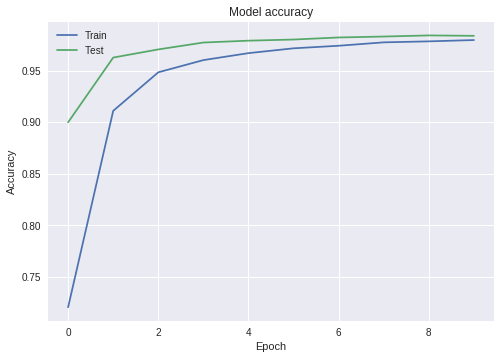

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,Dropout


#creazione della sequenza keras per il modello Convolutional Neural Network
model = Sequential()
model.add(Conv2D(f_size1, kernel_size=3, activation='relu', input_shape=(width,height,channels)))
model.add(Dropout(0.3))

model.add(Conv2D(f_size2, kernel_size=3, activation='relu'))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(Xtrain_reshaped, y_train_cat, validation_data=(Xtest_reshaped, y_test_cat), epochs=10,batch_size=1024,shuffle=True)


plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

9
res 5
9
res 7
3
res 7
4
res 2
6
res 0
9
res 4
9
res 8
2
res 7
3
res 7
8
res 7
6
res 0
4
res 9
9
res 8
8
res 6
8
res 3
8
res 3
2
res 8
5
res 3
8
res 4
1
res 7
20


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


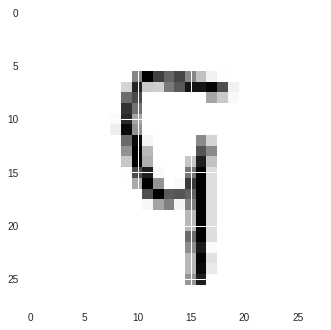

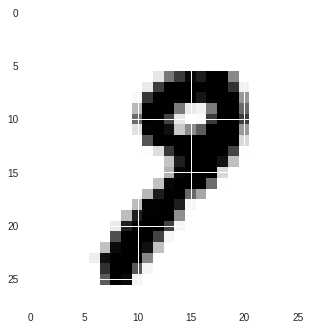

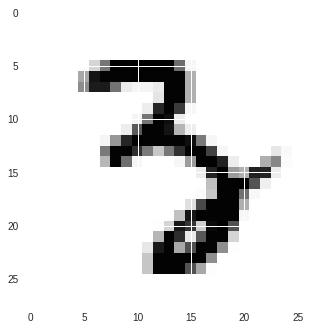

In [0]:
import numpy as np

predictions = model.predict(Xtest_reshaped)

counter = 0
for l in range(len(predictions)):
  if(np.argmax(predictions[l])!=np.argmax(y_test_cat[l])  ):
    counter+=1
    imagex = Xtest_reshaped[l]*256
    imagex = imagex.reshape(28,28)
    plt.imshow(imagex)
    print(np.argmax(y_test_cat[l]))
    print("res",np.argmax(predictions[l]))
    plt.figure()

    if(counter==20) :
      break;

print(counter)

